# Defi-IA 2022 <a href="https://www.kaggle.com/c/defi-ia-2022/overview"><img src="https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png" style="max-width: 70px; display: inline" alt="Python"/></a>
-------------------------------------------------------------

**Predict the accumulated daily rainfall on ground stations**  
*Quentin Douzery, Alexia Ghozland, Dario Moed*

## <font color = 'royalblue'>1 Imports</font>

### 1.1 Packages

In [2]:
##Packages
import time
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV,train_test_split 
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor,MLPClassifier
from sklearn.ensemble import RandomForestClassifier ,RandomForestRegressor
from sklearn.preprocessing import scale , StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#from keras.models import Sequential

from tqdm import tqdm

In [3]:
pd.options.mode.chained_assignment = None  # default='warn'

### 1.2 Data

In [3]:
##Données
#coords_path = 'C:/Users/Alexia/Desktop/Other/stations_coordinates.csv' #Perso
#coords_fname  = '/kaggle/input/defi-ia-2022-test/Other/Other/stations_coordinates.csv'

#xtrainS_path = 'C:/Users/Alexia/Desktop/Data/Train/X_station_train.csv' #Perso
#fname = '/kaggle/input/defi-ia-2022-test/Train/Train/X_station_train.csv'

#ytrain_path = 'C:/Users/Alexia/Desktop/Data/Train/Y_train.csv' #Perso
#fname = '/kaggle/input/defi-ia-2022-test/Train/Train/Y_train.csv'

#xtestS_path = 'C:/Users/Alexia/Desktop/Data/Test/X_station_test.csv' #Perso

#bl_obsT_path = 'C:/Users/Alexia/Desktop/Data/Test/Baselines/Baseline_observation_test.csv' #Perso

In [4]:
# ##Données
#coords_path = '/Users/qdouzery/Desktop/Defi-IA_Data/Other/stations_coordinates.csv' #Perso
coords_path = '/home/douzery/Bureau/Defi-IA_Data/Other/stations_coordinates.csv' #INSA

#xtrainS_path = '/Users/qdouzery/Desktop/Defi-IA_Data/Train/X_station_train.csv' #Perso
xtrainS_path = '/home/douzery/Bureau/Defi-IA_Data/Train/X_station_train.csv' #INSA

#ytrain_path = '/Users/qdouzery/Desktop/Defi-IA_Data/Train/Y_train.csv' #Perso
ytrain_path = '/home/douzery/Bureau/Defi-IA_Data/Train/Y_train.csv' #INSA

#xtestS_path = '/Users/qdouzery/Desktop/Defi-IA_Data/Test/X_station_test.csv' #Perso
xtestS_path = '/home/douzery/Bureau/Defi-IA_Data/Test/X_station_test.csv' #INSA

#bl_obsT_path = '/Users/qdouzery/Desktop/Defi-IA_Data/Test/Baselines/Baseline_observation_test.csv' #Perso
bl_obsT_path = '/home/douzery/Bureau/Defi-IA_Data/Test/Baselines/Baseline_observation_test.csv' #INSA

## <font color = 'royalblue'>2 Récupération des données</font>

### 2.0 Fonctions utiles

In [7]:
def Get_NumberSta (id):
    return int(id.split('_')[0])

### 2.1 Coordonnées des stations

In [8]:
##Coords
coords = pd.read_csv(coords_path)
display(coords)
print('Missing Data :', coords.isna().sum().sum(), '\n', 'Shape is :', coords.shape)

,number_sta,lat,lon,height_sta
0,86118001,46.477,0.985,120.0
1,86149001,46.917,0.025,60.0
2,56081003,48.050,-3.660,165.0
3,53215001,47.790,-0.710,63.0
4,22135001,48.550,-3.380,148.0
...,...,...,...,...
320,86137003,47.035,0.098,96.0
321,86165005,46.412,0.841,153.0
322,86273001,46.464,1.042,121.0
323,91200002,48.526,1.993,116.0


Missing Data : 0 
 Shape is : (325, 4)


### 2.2 X_train

In [9]:
##X_train
xtrainS = pd.read_csv(xtrainS_path,parse_dates=['date'],infer_datetime_format=True)
xtrainS['number_sta'] = xtrainS['number_sta'].astype('category')  
display(xtrainS)
print('Missing Data :', xtrainS.isna().sum().sum(), '\n', 'Shape is :', xtrainS.shape)

,number_sta,date,ff,t,td,hu,dd,precip,Id
0,14066001,2016-01-01 00:00:00,3.05,279.28,277.97,91.4,200.0,0.0,14066001_0_0
1,14066001,2016-01-01 01:00:00,2.57,278.76,277.45,91.4,190.0,0.0,14066001_0_1
2,14066001,2016-01-01 02:00:00,2.26,278.27,277.02,91.7,181.0,0.0,14066001_0_2
3,14066001,2016-01-01 03:00:00,2.62,277.98,276.95,93.0,159.0,0.0,14066001_0_3
4,14066001,2016-01-01 04:00:00,2.99,277.32,276.72,95.9,171.0,0.0,14066001_0_4
...,...,...,...,...,...,...,...,...,...
4409469,95690001,2017-12-30 19:00:00,9.10,286.68,283.44,80.8,239.0,0.0,95690001_729_19
4409470,95690001,2017-12-30 20:00:00,8.58,286.39,283.21,81.1,231.0,0.0,95690001_729_20
4409471,95690001,2017-12-30 21:00:00,8.74,286.28,283.40,82.6,226.0,0.0,95690001_729_21
4409472,95690001,2017-12-30 22:00:00,9.04,286.21,283.29,82.4,224.0,0.0,95690001_729_22


Missing Data : 6899007 
 Shape is : (4409474, 9)


**Ajout des coordonnées des stations**

In [10]:
xtrainS = xtrainS.merge(coords, how='left', on='number_sta')
display(xtrainS)
print('Missing Data :', xtrainS.isna().sum().sum(), '\n', 'Shape is :', xtrainS.shape)

,number_sta,date,ff,t,td,hu,dd,precip,Id,lat,lon,height_sta
0,14066001,2016-01-01 00:00:00,3.05,279.28,277.97,91.4,200.0,0.0,14066001_0_0,49.334,-0.431,2.0
1,14066001,2016-01-01 01:00:00,2.57,278.76,277.45,91.4,190.0,0.0,14066001_0_1,49.334,-0.431,2.0
2,14066001,2016-01-01 02:00:00,2.26,278.27,277.02,91.7,181.0,0.0,14066001_0_2,49.334,-0.431,2.0
3,14066001,2016-01-01 03:00:00,2.62,277.98,276.95,93.0,159.0,0.0,14066001_0_3,49.334,-0.431,2.0
4,14066001,2016-01-01 04:00:00,2.99,277.32,276.72,95.9,171.0,0.0,14066001_0_4,49.334,-0.431,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4409469,95690001,2017-12-30 19:00:00,9.10,286.68,283.44,80.8,239.0,0.0,95690001_729_19,49.108,1.831,126.0
4409470,95690001,2017-12-30 20:00:00,8.58,286.39,283.21,81.1,231.0,0.0,95690001_729_20,49.108,1.831,126.0
4409471,95690001,2017-12-30 21:00:00,8.74,286.28,283.40,82.6,226.0,0.0,95690001_729_21,49.108,1.831,126.0
4409472,95690001,2017-12-30 22:00:00,9.04,286.21,283.29,82.4,224.0,0.0,95690001_729_22,49.108,1.831,126.0


Missing Data : 6899007 
 Shape is : (4409474, 12)


### 2.3 Y_train

In [11]:
#Y_train
ytrain = pd.read_csv(ytrain_path, parse_dates=['date'], infer_datetime_format=True)
ytrain['number_sta'] = ytrain['number_sta'].astype('category')
display(ytrain)
print('Missing Data :', ytrain.isna().sum().sum(), '\n', 'Shape is :', ytrain.shape)

,date,number_sta,Ground_truth,Id
0,2016-01-02,14066001,3.4,14066001_0
1,2016-01-02,14126001,0.5,14126001_0
2,2016-01-02,14137001,3.4,14137001_0
3,2016-01-02,14216001,4.0,14216001_0
4,2016-01-02,14296001,13.3,14296001_0
...,...,...,...,...
183742,2017-12-31,86137003,5.0,86137003_729
183743,2017-12-31,86165005,3.2,86165005_729
183744,2017-12-31,86272002,1.8,86272002_729
183745,2017-12-31,91200002,1.6,91200002_729


Missing Data : 21640 
 Shape is : (183747, 4)


### 2.4 X_test

In [13]:
##X_test
xtestS = pd.read_csv(xtestS_path,infer_datetime_format=True)
display(xtestS)
print('Missing Data :', xtestS.isna().sum().sum(), '\n', 'Shape is :', xtestS.shape)

,dd,hu,td,t,ff,precip,month,Id
0,NaN,NaN,NaN,278.35,NaN,NaN,12,14047002_277_4
1,NaN,NaN,NaN,278.40,NaN,0.0,12,14047002_277_5
2,NaN,NaN,NaN,279.01,NaN,0.0,12,14047002_277_6
3,NaN,NaN,NaN,279.66,NaN,0.0,12,14047002_277_7
4,NaN,NaN,NaN,279.99,NaN,0.0,12,14047002_277_8
...,...,...,...,...,...,...,...,...
2304797,190.0,82.8,277.00,279.74,10.62,0.0,12,95690001_176_19
2304798,195.0,84.2,277.44,279.93,11.86,0.0,12,95690001_176_20
2304799,199.0,85.7,277.95,280.21,11.77,0.0,12,95690001_176_21
2304800,198.0,85.3,278.25,280.58,10.16,0.0,12,95690001_176_22


Missing Data : 3914287 
 Shape is : (2304802, 8)


**Ajout des coordonnées des stations**

In [14]:
#Create 'number_sta' column
xtestS = xtestS.assign(number_sta=pd.Series(np.zeros(xtestS.shape[0])).values)
xtestS.loc[:,"number_sta"] = xtestS.loc[:,"Id"].apply(Get_NumberSta)

In [15]:
xtestS = xtestS.merge(coords, how='left', on='number_sta')
display(xtestS)
print('Missing Data :', xtestS.isna().sum().sum(), '\n', 'Shape is :', xtestS.shape)

,dd,hu,td,t,ff,precip,month,Id,number_sta,lat,lon,height_sta
0,NaN,NaN,NaN,278.35,NaN,NaN,12,14047002_277_4,14047002,49.275,-0.712,60.0
1,NaN,NaN,NaN,278.40,NaN,0.0,12,14047002_277_5,14047002,49.275,-0.712,60.0
2,NaN,NaN,NaN,279.01,NaN,0.0,12,14047002_277_6,14047002,49.275,-0.712,60.0
3,NaN,NaN,NaN,279.66,NaN,0.0,12,14047002_277_7,14047002,49.275,-0.712,60.0
4,NaN,NaN,NaN,279.99,NaN,0.0,12,14047002_277_8,14047002,49.275,-0.712,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2304797,190.0,82.8,277.00,279.74,10.62,0.0,12,95690001_176_19,95690001,49.108,1.831,126.0
2304798,195.0,84.2,277.44,279.93,11.86,0.0,12,95690001_176_20,95690001,49.108,1.831,126.0
2304799,199.0,85.7,277.95,280.21,11.77,0.0,12,95690001_176_21,95690001,49.108,1.831,126.0
2304800,198.0,85.3,278.25,280.58,10.16,0.0,12,95690001_176_22,95690001,49.108,1.831,126.0


Missing Data : 3914287 
 Shape is : (2304802, 12)


### 2.5 Baseline observations

In [16]:
bl_obsT = pd.read_csv(bl_obsT_path,infer_datetime_format=True)

## <font color = 'royalblue'>3 Pre-processing</font>

### 3.0 Fonctions utiles

In [17]:
def Get_StationDay (id):
    return id.split('_')[0] + "_" + id.split('_')[1]

In [18]:
def Id_to_int (id):
    return int(id.split('_')[0] + id.split('_')[1] + id.split('_')[2])

### 3.1 Add 'month' variable

In [19]:
xtrainS['month'] = xtrainS['date'].dt.month
display(xtrainS)
print('Missing Data :', xtrainS.isna().sum().sum(), '\n', 'Shape is :', xtrainS.shape)

,number_sta,date,ff,t,td,hu,dd,precip,Id,lat,lon,height_sta,month
0,14066001,2016-01-01 00:00:00,3.05,279.28,277.97,91.4,200.0,0.0,14066001_0_0,49.334,-0.431,2.0,1
1,14066001,2016-01-01 01:00:00,2.57,278.76,277.45,91.4,190.0,0.0,14066001_0_1,49.334,-0.431,2.0,1
2,14066001,2016-01-01 02:00:00,2.26,278.27,277.02,91.7,181.0,0.0,14066001_0_2,49.334,-0.431,2.0,1
3,14066001,2016-01-01 03:00:00,2.62,277.98,276.95,93.0,159.0,0.0,14066001_0_3,49.334,-0.431,2.0,1
4,14066001,2016-01-01 04:00:00,2.99,277.32,276.72,95.9,171.0,0.0,14066001_0_4,49.334,-0.431,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4409469,95690001,2017-12-30 19:00:00,9.10,286.68,283.44,80.8,239.0,0.0,95690001_729_19,49.108,1.831,126.0,12
4409470,95690001,2017-12-30 20:00:00,8.58,286.39,283.21,81.1,231.0,0.0,95690001_729_20,49.108,1.831,126.0,12
4409471,95690001,2017-12-30 21:00:00,8.74,286.28,283.40,82.6,226.0,0.0,95690001_729_21,49.108,1.831,126.0,12
4409472,95690001,2017-12-30 22:00:00,9.04,286.21,283.29,82.4,224.0,0.0,95690001_729_22,49.108,1.831,126.0,12


Missing Data : 6899007 
 Shape is : (4409474, 13)


### 3.2 Train data

In [20]:
def Preprocess_train (xtrain, ytrain):
    #Copy original df
    xtrain_p = xtrain.copy()
    ytrain_p = ytrain.copy()
    
    #Remove NaNs
    xtrain_p.dropna(inplace=True)
    ytrain_p.dropna(inplace=True)
    
    #Create 'StationDay' column
    xtrain_p = xtrain_p.assign(StationDay=pd.Series(np.zeros(xtrain_p.shape[0])).values)
    xtrain_p.loc[:,"StationDay"] = xtrain_p.loc[:,"Id"].apply(Get_StationDay)
    
    #Drop useless columns
    xtrain_p.drop(['number_sta', 'date', 'Id'], axis=1, inplace=True)
    ytrain_p.drop(['date', 'number_sta'], axis=1, inplace=True)
    
    #Mean on 24 hours (except 'precip')
    xtrain_p = xtrain_p.groupby("StationDay", as_index=False).agg(pd.Series.sum, min_count = 24)
    xtrain_p[['dd', 'hu', 'td', 't', 'ff', 'month',
              'lat', 'lon', 'height_sta']] = xtrain_p[['dd', 'hu', 'td', 't', 'ff', 'month',
                                                       'lat', 'lon', 'height_sta']].divide(24)
    
    #Remove NaNs
    xtrain_p.dropna(inplace=True)
    
    #Keep the same rows in X_train and Y_train
    xtrain_p = xtrain_p.loc[xtrain_p['StationDay'].isin(ytrain_p["Id"])]
    ytrain_p = ytrain_p.loc[ytrain_p['Id'].isin(xtrain_p["StationDay"])]
    
    #Reset index
    xtrain_p.reset_index(drop=True,inplace=True)
    ytrain_p.reset_index(drop=True,inplace=True)
    
    #Sort xtrain
    xtrain_p = xtrain_p.set_index('StationDay')
    xtrain_p = xtrain_p.reindex(index=ytrain_p['Id'])
    xtrain_p = xtrain_p.reset_index()
    
    return xtrain_p, ytrain_p

In [59]:
xtrainS_p, ytrain_p = Preprocess_train(xtrainS, ytrain)

**Create Y_train for classification**

In [60]:
ytrain_c = ytrain_p.copy()
ytrain_c['Ground_truth'][ytrain_c['Ground_truth'] != 0] = 1
display(ytrain_c)
print('Missing Data :', ytrain_c.isna().sum().sum(), '\n', 'Shape is :', ytrain_c.shape)

,Ground_truth,Id
0,1.0,14066001_0
1,1.0,14216001_0
2,1.0,14372001_0
3,1.0,14578001_0
4,1.0,14762004_0
...,...,...
82115,1.0,86027001_729
82116,1.0,86137003_729
82117,1.0,86165005_729
82118,1.0,91200002_729


Missing Data : 0 
 Shape is : (82120, 2)


In [61]:
print(ytrain_c['Ground_truth'].value_counts())

1.0    48536
0.0    33584
Name: Ground_truth, dtype: int64


### 3.3 Test data

In [47]:
def Preprocess_test (xtest, bl_obsT):
    #Copy original df
    xtest_p = xtest.copy()
    
    #Create 'IntId' column
    xtest_p = xtest_p.assign(IntId=pd.Series(np.zeros(xtest_p.shape[0])).values)
    xtest_p.loc[:,"IntId"] = xtest_p.loc[:,"Id"].apply(Id_to_int)
    
    #Sort xtest on 'IntId' values
    xtest_p = xtest_p.sort_values('IntId', ignore_index=True)
    
    #Fill NaNs
    xtest_p = xtest_p.fillna(method="backfill")
    
    #Create 'StationDay' column
    xtest_p = xtest_p.assign(StationDay=pd.Series(np.zeros(xtest_p.shape[0])).values)
    xtest_p.loc[:,"StationDay"] = xtest_p.loc[:,"Id"].apply(Get_StationDay)
    
    #Drop useless variables
    xtest_p.drop(['Id', 'IntId', 'number_sta'], axis=1, inplace=True)

    #Mean on 24 hours (except 'precip')
    xtest_p = xtest_p.groupby("StationDay", as_index=False).agg(pd.Series.sum, min_count = 24)
    xtest_p[['dd', 'hu', 'td', 't', 'ff', 'month',
             'lat', 'lon', 'height_sta']] = xtest_p[['dd', 'hu', 'td', 't', 'ff', 'month',
                                                     'lat', 'lon', 'height_sta']].divide(24)
    
    #Remove NaNs
    xtest_p.dropna(inplace=True)
    
    #Keep the same rows in xtest and ytest
    xtest_p = xtest_p.loc[xtest_p['StationDay'].isin(bl_obsT["Id"])]

    #Reset index
    xtest_p.reset_index(drop=True, inplace=True)
    
    #Sort xtest
    xtest_p = xtest_p.set_index('StationDay')
    xtest_p = xtest_p.reindex(index=bl_obsT['Id'])
    xtest_p = xtest_p.reset_index()
    
    #Rearrange columns order
    xtest_p = xtest_p[['ff', 't', 'td', 'hu', 'dd', 'precip', 'lat', 'lon', 'height_sta', 'month']]
    
    return xtest_p

In [48]:
xtestS_p = Preprocess_test(xtestS, bl_obsT)

## <font color = 'royalblue'>4 Validation</font>

### 4.1 Metrics

In [34]:
def MAPE(ypred, ytrue):
    aux = abs((ytrue-ypred)/ytrue)
    return 100*aux.mean(axis=0)

In [132]:
def Score_classif(ypred, ytrue):
    aux = abs(ytrue-ypred)
    return 100*(1-aux.mean(axis=0))

### 4.2 Get dummies for 'month'

In [44]:
def Month_dummies(x):
    x_dum = pd.get_dummies(x['month'])
    del x_dum[1]
    x_dum.columns = ['M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'M08', 'M09', 'M10', 'M11', 'M12']
    
    return x_dum

### 4.3 Normalization

In [55]:
def normalization(x_train, x_test):
    #Copy of the original df
    x_train_c = x_train.copy()
    x_test_c = x_test.copy()
    
    #Calcul de la moyenne et de la variance de l'échantillon train
    mean = x_train_c.mean()
    std  = x_train_c.std()
    
    #Normalisation
    x_train_c = (x_train_c - mean) / std
    x_test_c  = (x_test_c  - mean) / std

    return x_train_c, x_test_c

### 4.4 Build model

In [56]:
def Classifier_0(shape, n_layers, n_neurons):
    ##Initialiser modèle
    classifier = keras.models.Sequential()
    ##Input layer
    classifier.add(keras.layers.Input(shape))
    
    ##Hidden layers
    for i in range(n_layers):
        classifier.add(keras.layers.Dense(n_neurons, kernel_initializer='uniform', activation='relu'))
        
    ##Output layer
    classifier.add(keras.layers.Dense(1, kernel_initializer='uniform', activation='sigmoid', name='Output'))
    
    ##Compile ANN
    classifier.compile(optimizer = 'adam',
                       loss = 'binary_crossentropy',
                       metrics = ['accuracy'])
    
    return classifier

### 4.5 Sampling

In [58]:
def Create_samples (xtrain, ytrain):
    ##Copy original df
    xtrain_c = xtrain.copy()
    ytrain_c = ytrain.copy()
    
    #Split X validation/train
    xtrain_v = xtrain_c.sample(frac=0.20, axis=0)
    xtrain_t = xtrain_c.drop(xtrain_v.index)
    
    ##Split Y validation/train
    ytrain_v = ytrain_c.loc[ytrain_c['Id'].isin(xtrain_v['Id'])]
    ytrain_t = ytrain_c.drop(ytrain_v.index)
    
    ##Reset index
    xtrain_t.reset_index(drop=True, inplace=True)
    xtrain_v.reset_index(drop=True, inplace=True)
    ytrain_t.reset_index(drop=True, inplace=True)
    ytrain_v.reset_index(drop=True, inplace=True)
    
    ##Sort X
    xtrain_t = xtrain_t.set_index('Id')
    xtrain_t = xtrain_t.reindex(index=ytrain_t['Id'])
    xtrain_t = xtrain_t.reset_index()
    
    xtrain_v = xtrain_v.set_index('Id')
    xtrain_v = xtrain_v.reindex(index=ytrain_v['Id'])
    xtrain_v = xtrain_v.reset_index()
    
    ##Drop useless variables
    xtrain_t.drop(['Id'], axis=1, inplace=True)
    xtrain_v.drop(['Id'], axis=1, inplace=True)
    ytrain_t.drop(['Id'], axis=1, inplace=True)
    ytrain_v.drop(['Id'], axis=1, inplace=True)
    
    return xtrain_t, xtrain_v, ytrain_t, ytrain_v

### 4.6 K-fold validation

In [158]:
K = 1
ACCURACY = np.zeros(K)

batch_size = 100
epochs = 10 #20
n_layers = 10 #10
n_neurons = 32 #64

for k in tqdm(range(K)):
    ##Create samples
    xtrain_t, xtrain_v, ytrain_t, ytrain_v = Create_samples(xtrainS_p, ytrain_c)
    
    ##Dummies dataframes for "month" before normalization
    xtrain_t_Dum = Month_dummies(xtrain_t)
    xtrain_v_Dum = Month_dummies(xtrain_v)
    
    ##Normalization
    xtrain_t_N, xtrain_v_N = normalization(xtrain_t, xtrain_v)
    
    ##Drop 'month' variable
    xtrain_t_N.drop(['month'], axis=1, inplace=True)
    xtrain_v_N.drop(['month'], axis=1, inplace=True)
    
    ##Concatenation after normalization: dummies + original df
    xtrain_t_N = pd.concat([xtrain_t_N, xtrain_t_Dum], axis=1)
    xtrain_v_N = pd.concat([xtrain_v_N, xtrain_v_Dum], axis=1)

    ##Build model
    nb_variables = xtrain_t_N.shape[1]
    classifier = Classifier_0(nb_variables, n_layers, n_neurons)
    
    ##Training
    history = classifier.fit(xtrain_t_N, ytrain_t, batch_size, epochs, verbose=0)
    
    ##Prediction
    ypred = classifier.predict(xtrain_v_N)
    ypred = (ypred > 0.5).astype(int)
    ypred = pd.DataFrame(ypred, columns=['Prediction'])
    
    ##Evaluate score
    ACCURACY[k] = Score_classif(ypred['Prediction'], ytrain_v['Ground_truth'])

100%|██████████| 1/1 [00:16<00:00, 16.61s/it]


Mean Accuracy : 70.27520701412567


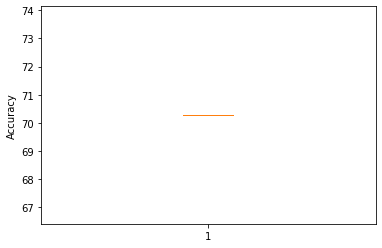

In [159]:
print("Mean Accuracy :", np.mean(ACCURACY))
plt.boxplot(ACCURACY)
plt.ylabel("Accuracy")
plt.show()

## Autres

In [46]:
xtrainS_p_Dum = Month_dummies(xtrainS_p)
display(xtrainS_p_Dum)
print('Missing Data :', xtrainS_p_Dum.isna().sum().sum(), '\n', 'Shape is :', xtrainS_p_Dum.shape)

,M02,M03,M04,M05,M06,M07,M08,M09,M10,M11,M12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
82115,0,0,0,0,0,0,0,0,0,0,1
82116,0,0,0,0,0,0,0,0,0,0,1
82117,0,0,0,0,0,0,0,0,0,0,1
82118,0,0,0,0,0,0,0,0,0,0,1


Missing Data : 0 
 Shape is : (82120, 11)


In [49]:
xtestS_p_Dum = Month_dummies(xtestS_p)
display(xtestS_p_Dum)
print('Missing Data :', xtestS_p_Dum.isna().sum().sum(), '\n', 'Shape is :', xtestS_p_Dum.shape)

,M02,M03,M04,M05,M06,M07,M08,M09,M10,M11,M12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
85135,0,0,0,0,0,0,0,0,0,0,1
85136,0,0,0,0,0,0,0,0,0,0,1
85137,0,0,0,0,0,0,0,0,0,0,1
85138,0,0,0,0,0,0,0,0,0,0,1


Missing Data : 0 
 Shape is : (85140, 11)


In [52]:
xtrainS_p.drop(['month'], axis=1, inplace=True)
xtestS_p.drop(['month'], axis=1, inplace=True)

In [72]:
#concatenation after normalization : dummies (month) + original df  
xtestS_p_N = xtestS_p_N.drop(['month'], axis=1)
xtestS_p_N = pd.concat([xtestS_p_N, xtestSDum],axis=1)
display(xtestS_p_N)

,ff,t,td,hu,dd,precip,lat,lon,height_sta,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
0,0.980765,-0.497757,-0.448918,0.100966,0.470561,-0.059868,1.142534,0.216380,-1.440594,0,0,0,0,0,0,0,0,0,0,0
1,0.370620,-0.705579,-0.329196,1.159621,-0.338094,-0.165261,0.954706,0.468373,0.315236,0,0,0,0,0,0,0,0,0,0,0
2,1.147026,-0.658605,-0.574031,0.255779,0.389422,-0.323350,0.989489,0.203061,-0.512716,0,0,0,0,0,0,0,0,0,0,0
3,-0.401753,-0.721333,-0.645407,0.263707,0.243590,-0.217957,0.739051,0.366617,0.743487,0,0,0,0,0,0,0,0,0,0,0
4,-0.086037,-0.934407,-1.829810,-1.748863,0.031421,0.519791,0.606876,-0.106469,3.327270,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85135,-0.991284,-1.902591,-1.527890,1.682480,-1.234467,-0.376046,-1.142212,0.498207,-0.098740,0,0,0,0,0,0,0,0,0,0,1
85136,-1.033665,-1.713688,-1.414701,1.380782,-1.381004,-0.376046,-1.761349,0.894043,0.714937,0,0,0,0,0,0,0,0,0,0,1
85137,-1.135585,-1.732319,-0.041486,1.442540,-0.426909,-0.376046,-1.709672,1.001126,0.258136,0,0,0,0,0,0,0,0,0,0,1
85138,-1.670443,-2.046822,-1.855861,1.152944,-1.636328,-0.376046,0.339544,1.507775,0.186761,0,0,0,0,0,0,0,0,0,0,1


## <font color = 'royalblue'>6 Validation</font>

### 6.1 Sampling

### 6.2 Monte Carlo validation

In [53]:
#seuil = 0.5
#seuil = 2
B = 10
MAPE_ = np.zeros(B)

for b in tqdm(range(B)):
    xtrain_t, xtrain_v, ytrain_t, ytrain_v = Create_samples(xtrainS_aux, ytrain_aux)
    
    #dummies dataframes for "month" before normalization
    xtrain_t_Dum = pd.get_dummies(xtrain_t['month'])
    xtrain_v_Dum = pd.get_dummies(xtrain_v['month'])
    del xtrain_t_Dum[1]
    del xtrain_v_Dum[1]
    
    #normalization
    xtrain_t_N, xtrain_v_N = normalization(xtrain_t, xtrain_v)
    
    #drop "month" 
    xtrain_t_N.drop(['month'], axis=1, inplace=True)
    xtrain_v_N.drop(['month'], axis=1, inplace=True)
    
    #concatenation after normalization: dummies + original df
    xtrain_t_N = pd.concat([xtrain_t_N, xtrain_t_Dum],axis=1)
    xtrain_v_N = pd.concat([xtrain_v_N, xtrain_v_Dum],axis=1)

    ytrain_v.loc[:,'Ground_truth'] = ytrain_v.loc[:,'Ground_truth'] + 1
    
    nb_variables = np.shape(xtrain_t_N)[1]
    nn = get_model(nb_variables, n_layers, n_neurons)
    
    #Entraînement
    history = nn.fit(xtrain_t_N, ytrain_t, batch_size, epochs, verbose=0)
    
    validation = nn.predict(xtrain_v_N)
    Network_validation = ytrain_v.copy()
    Network_validation['Ground_truth'] = validation
    Network_validation.rename(columns={'Ground_truth':'Prediction'}, inplace=True)

    Network_validation.loc[:,'Prediction'] = Network_validation.loc[:,'Prediction'] + 1
    
    MAPE_[b] = MAPE(Network_validation['Prediction'], ytrain_v['Ground_truth'])

100%|██████████| 10/10 [03:58<00:00, 23.81s/it]


Mean MAPE : 31.362491324579644


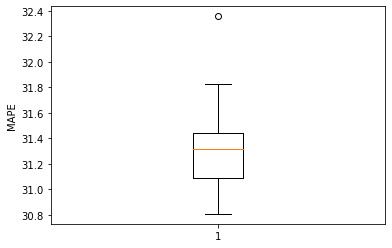

In [57]:
print("Mean MAPE :", np.mean(MAPE_))
plt.boxplot(MAPE_)
plt.ylabel("MAPE")
plt.show()

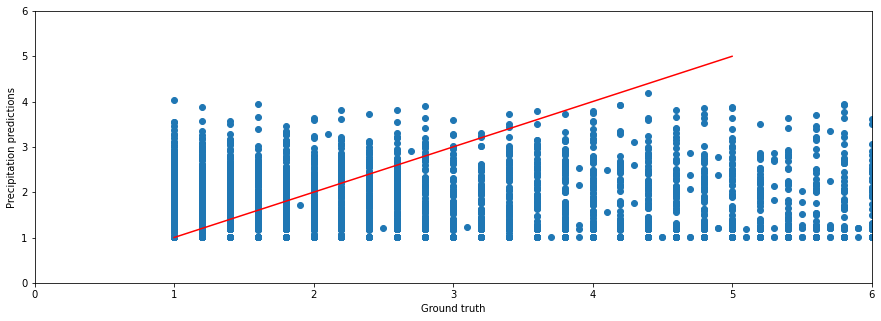

In [61]:
plt.figure(figsize=(15,5))
#true_line = np.arange(min(ytrain_v['Ground_truth']),max(ytrain_v['Ground_truth'])+1)
true_line = np.arange(min(ytrain_v['Ground_truth']),6)
plt.scatter(ytrain_v['Ground_truth'], Network_validation['Prediction'])
plt.plot(true_line, true_line, color='r')
plt.xlim((0,6))
plt.ylim((0,6))
plt.xlabel("Ground truth")
plt.ylabel("Precipitation predictions")
plt.show()

## <font color = 'royalblue'>7 Prediction</font>

In [51]:
predictions_network = NN.predict(xtestS_p_N)
Network_predictions = bl_obsT.copy()
Network_predictions["Prediction"] = predictions_network
display(Network_predictions.head())

ValueError: in user code:

    /usr/local/insa/anaconda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /usr/local/insa/anaconda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/insa/anaconda/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/insa/anaconda/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/insa/anaconda/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /usr/local/insa/anaconda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /usr/local/insa/anaconda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /usr/local/insa/anaconda/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /usr/local/insa/anaconda/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 10 but received input with shape (None, 20)


## <font color = 'royalblue'>8 Post-processing</font>

In [59]:
Network_predictions["Prediction"] = Network_predictions["Prediction"] + 1
display(Network_predictions.head())
print('Missing Data :', Network_predictions.isna().sum().sum(), '\n', 'Shape is :', Network_predictions.shape)

,Id,Prediction
0,14066001_149,15.081931
1,14126001_149,3.642311
2,14137001_149,15.374870
3,14216001_149,5.590810
4,14296001_149,2.025035


Missing Data : 0 
 Shape is : (85140, 2)


## <font color = 'royalblue'>9 Exportation</font>

In [60]:
output_file = "Submissions_15_ann-20x32-fail.csv"
Network_predictions.to_csv('/Users/qdouzery/Desktop/Defi-IA-2022_DGM/Submissions/' + output_file, index=False)

#output_file = "Submissions_13_ann-20x32-month-mae.csv"
#Network_predictions.to_csv('C:/Users/Alexia/Desktop/5A/Defi-IA-2022_DGM/Submissions' + output_file, index=False)